In [2]:

import pandas as pd 
import numpy as np


In [3]:
data=pd.read_csv('Fraud.csv')
data.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
data.shape

(6362620, 11)

In [52]:
data['step'].value_counts()

step
19     51352
18     49579
187    49083
235    47491
307    46968
       ...  
432        4
706        4
693        4
112        2
662        2
Name: count, Length: 743, dtype: int64

In [5]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [6]:
data.duplicated().sum()

0

In [7]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [9]:
data.value_counts()


step  type      amount      nameOrig     oldbalanceOrg  newbalanceOrig  nameDest     oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud
1     CASH_IN   270.78      C619985571   4184966.65     4185237.43      C875917495   3019.00         0.00            0        0                 1
306   CASH_OUT  220427.13   C1029846599  0.00           0.00            C129321077   882543.64       1102970.77      0        0                 1
                221047.89   C644407995   13756.00       0.00            C1396283314  9082.00         0.00            0        0                 1
                221009.03   C74685400    102768.00      0.00            C1714223283  767644.73       988653.76       0        0                 1
                220986.46   C540058568   9141.00        0.00            C1344091292  0.00            220986.46       0        0                 1
                                                                                                                                 

In [10]:
data['type'].value_counts()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

In [130]:
data['step'].value_counts()

step
19     51352
18     49579
187    49083
235    47491
307    46968
       ...  
432        4
706        4
693        4
112        2
662        2
Name: count, Length: 743, dtype: int64

In [29]:
print(len(data['isFraud']==0))
data['type'].value_counts()

6362620


type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

In [58]:
data_with_new_balance_zero=data[data['newbalanceOrig']==0.00]
data_with_new_balance_zero.shape

(3609566, 11)

In [43]:
data_with_zero=data[(data['newbalanceOrig']==0.00)& ((data['type']=='TRANSFER')| (data['type']=='CASH_OUT'))]
data_with_zero.shape

(2496656, 11)

In [27]:
fraud=data[data['isFraud']==1]
fraud_in_payment=fraud[fraud['type']=='PAYMENT']
fraud['type'].value_counts()


type
CASH_OUT    4116
TRANSFER    4097
Name: count, dtype: int64

In [134]:
fraud['step'].value_counts()

step
212    40
523    30
387    28
425    28
249    28
       ..
202     2
589     2
112     2
548     2
662     2
Name: count, Length: 741, dtype: int64

In [45]:
fraud_with_zero=fraud[fraud['newbalanceOrig']==0.00]

fraud_without_zero=fraud[fraud['newbalanceOrig']!=0.00]
fraud_with_zero.shape



(8053, 11)

In [20]:
fraud_without_previous_zero=fraud[(fraud['newbalanceOrig']==0.00) &(fraud['oldbalanceOrg']!=0.00)]
fraud_without_previous_zero.shape

(8012, 11)

In [13]:
import matplotlib.pyplot as plt 


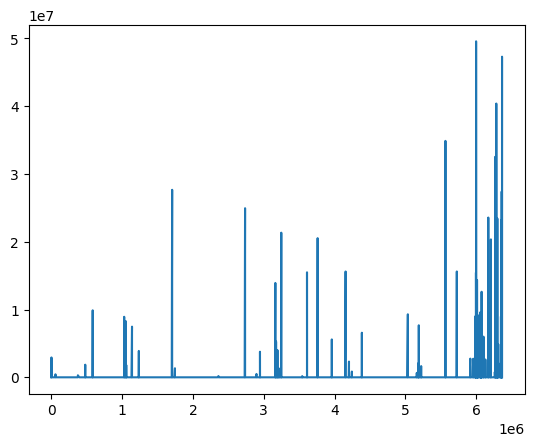

In [14]:
plt.plot(fraud['newbalanceOrig'])
plt.show()

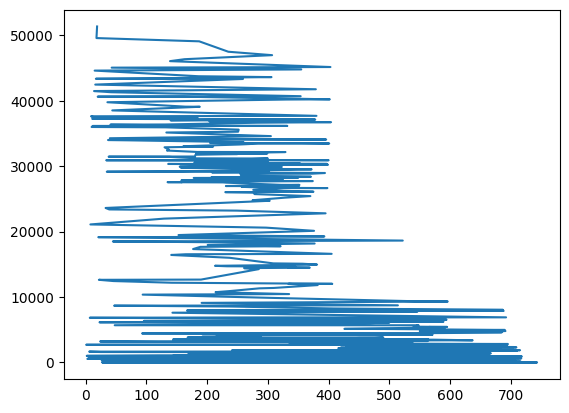

In [143]:
plt.plot(data['step'].value_counts())
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

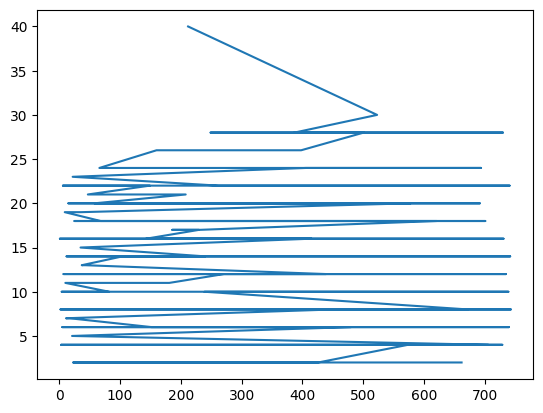

In [144]:
plt.plot(fraud['step'].value_counts())
plt.show

In [46]:
#fraud data where newbalanceDest-oldbalanceDest is equal to the oldbalanceOrig 
fraudx=data[data['newbalanceDest']-data['oldbalanceDest']==data['oldbalanceOrg']]
fraudx.shape

(776915, 11)

In [51]:
ans=0
for i in data['nameDest']:
    if i in data['nameOrig']:
        ans=ans+1 
print(ans)
#from this we can conclude that all the transactions are unique and have no relation between them

0


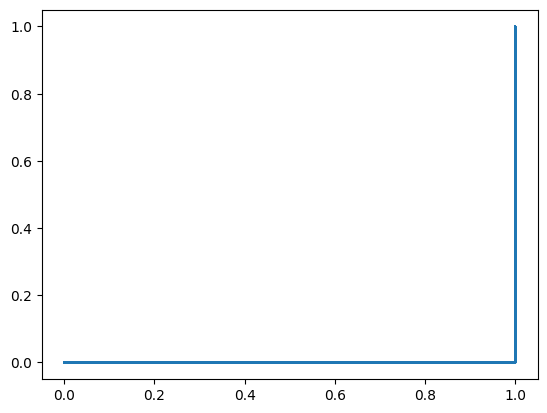

In [54]:
plt.plot(data['isFraud'],data['isFlaggedFraud'])
plt.show()

In [59]:
both_fraud_flag=data[(data['isFraud']==1)& (data['isFlaggedFraud']==1)]
both_fraud_flag.shape
data['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [60]:
data['isFlaggedFraud'].value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

In [61]:
data['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [62]:
data['type']=data['type'].replace({'PAYMENT':0,'TRANSFER':1,'CASH_OUT':2,'DEBIT':3,'CASH_IN':4})


In [63]:
data.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,0,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,0,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,1,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,2,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,0,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [64]:
first_try=data[['step','type','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']]
first_try.head(5)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,1,0,9839.64,170136.0,160296.36,0.0,0.0
1,1,0,1864.28,21249.0,19384.72,0.0,0.0
2,1,1,181.00,181.0,0.00,0.0,0.0
3,1,2,181.00,181.0,0.00,21182.0,0.0
4,1,0,11668.14,41554.0,29885.86,0.0,0.0


In [65]:
first_try_y=data[['isFraud']]
first_try_y.head(5)

,isFraud
0,0
1,0
2,1
3,1
4,0


In [87]:
from sklearn.model_selection import train_test_split 

x_train,x_test,y_train,y_test=train_test_split(first_try,first_try_y,test_size=0.2,random_state=12)

In [88]:
from sklearn.preprocessing import RobustScaler
scalar=RobustScaler()
X_train=scalar.fit_transform(x_train)
X_test=scalar.transform(x_test)


In [89]:
X_train.shape

(5090096, 7)

In [123]:
from sklearn.ensemble import RandomForestClassifier 

random=RandomForestClassifier(class_weight="balanced",random_state=23,n_estimators=100) 
random.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', random_state=23)

In [124]:
prediction=random.predict(X_test)
prediction

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [125]:
from sklearn.metrics import accuracy_score 

accuracy=accuracy_score(prediction,y_test)
accuracy

0.9997084534358488

In [126]:
from sklearn.metrics import f1_score 

score=f1_score(prediction,y_test)
score

0.8785597381342062

In [127]:
from sklearn.metrics import roc_auc_score
score2=roc_auc_score(prediction,y_test)
score2

0.9936061586816148

In [128]:
from sklearn.metrics import precision_score 
precision=precision_score(prediction,y_test) 
precision

0.7912735849056604

In [ ]:

# Data Cleaning:
# There are no duplicates and missing values in the dataset given.

# Outliers:
# I experimented with multiple scaling techniques and decided to use Robust Scaler to deal with outliers.

# Multi-collinearity:
# To deal with multi-collinearity and to produce better results, used Random Forest Regressor.

# Fraud-Detection-Model:
# This model is built using RandomForestClassifier to classify whether the given transaction is fraud or NOT.
# It takes sender transaction history and recipient transaction history along with amount transfer and 
# time of the month into consideration in classifying whether it is fraud or not.

# Variables-Selected:
# I eliminated both nameOrig and nameDest because there is no relation between them. 
# I checked if the fraud nameDest is becoming nameOrig again and being marked as fraud, but no. 
# All the nameDest and nameOrig are unique and transaction id would have no meaning if there is no relation, so I removed them.
# Second, isFlaggedFraud is also removed as there is not much relation between it and isFraud, and isFlaggedFraud is heavily on non-fraud data.

# Included (step):
# Included because frauds are more likely to be committed in the first weeks of a month as you have more money, salary credited, etc. 
# And also the number of transactions decreases as we move to the end of month. More transactions, more chances of fraud. 
# So I thought although this would have a minor effect on the fraud, I still included it.

# Included (oldbalanceOrg, newbalanceOrig):
# I included both of them because these are most important in classifying fraud or not as newbalanceOrig is zero 
# and the type is transfer/cash-out has more fraud rate and these are the most important in classifying.

# Included (oldbalanceDest, newbalanceDest):
# Same reason as why I included oldbalanceOrig, newbalanceOrig.

# Included (amount):
# Amount is important in classifying the fraud.

# Included (type):
# Type is the most important classifying factor for fraud as all the fraud cases are either transfer or cash-out.

# Model Selection:
# I experimented with logistic regression and random forest and chose random forest because it has high accuracy with multiple features 
# as well as it is robust against outliers and multi-collinearity and also produces high accuracy.
# I chose parameters of n_estimators=100 because it is giving the best results.
# I chose the class_weights=balanced because there is a huge imbalance in the number of fraud and non-fraud cases. 
# It will produce high errors if it is not dealt with.

# Robust Scaler:
# I chose robust scaler because it works great with outliers. I concluded it is the best method to deal with outliers as well as scale the values.

# Metrics:
# accuracy = 0.9997084534358488
# f1_score = 0.8785597381342062
# roc_auc_score = 0.9936061586816148
# precision_score = 0.7912735849056604
# Above metrics clearly show that the model has high accuracy and can accurately classify fraud and non-fraud.

# Selected params:
# I clearly explained why the params I chose make sense and how they affect the prediction.

# Prevention by the company:
# The company should use a fraud detection model with higher accuracy and f1_score to detect frauds, 
# and use high secure authentication to be secure from frauds. They should gather all the previous fraud accounts or data, 
# be regularly updated and prevent them by blocking, etc. measures to prevent fraud as much as possible.

# I would regularly update the data, take feedback from users, and keep on improving the model as well as the security of the company.
# Identify the frauds even before the transaction, prevent and keep a track on the suspicious transactions and block/authentication, etc.
# Regular feedback to control fraud.
